## Structure learning in decomposable graphical models

Two examples of the parallel sampler for Bayesian structure learning are shown in this section for both continuous and discrete data.

In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns

from parallelDG.graph import trajectory
import parallelDG.graph.graph as glib
import parallelDG.graph.decomposable as dlib
import parallelDG.distributions.g_intra_class as gic
import parallelDG.auxiliary_functions as aux
from parallelDG.distributions import discrete_dec_log_linear as loglin
import parallelDG.mh_parallel as pdg
sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Discrete log-linear models

The first two rows (i.e. index 0 and 1), of the file should specify the labels and the levels of the corresponding variables. 

#### Czech auto workers data

In [9]:
aw_df = pd.read_csv("../sample_data/czech_autoworkers.csv", header=[0, 1]) 

In [10]:
aw_df.head(2)

,A,B,C,D,E,F
,2,2,2,2,2,2
0,1,1,1,0,0,0
1,1,1,1,0,0,0


In [11]:
aw_df.shape

(1841, 6)

In [13]:
np.random.seed(1)
aw_graph_traj = pdg.sample_trajectory_loglin(dataframe=aw_df,n_samples=10000, randomize=100,reset_cache=False)

Parallel Metropolis-Hastings samples: 100%|██████████| 9999/9999 [00:01<00:00, 8412.83it/s]

Total of 11738 updates, for an average of 1.17 per iteration or 9850.66updates/sec
Acceptance rate 0.0679


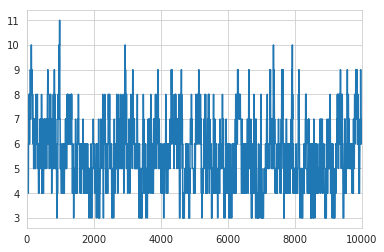

In [6]:
aw_graph_traj.size().plot();

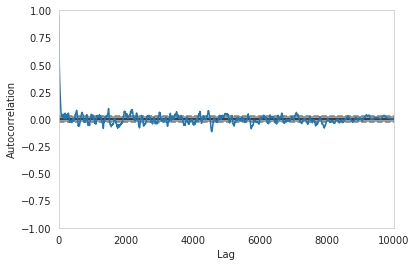

In [7]:
autocorrelation_plot(aw_graph_traj.size());

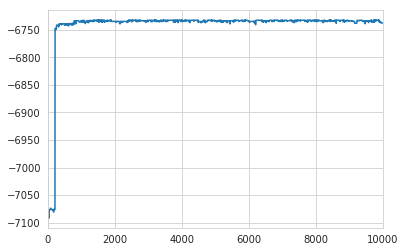

In [8]:
aw_graph_traj.log_likelihood().plot();

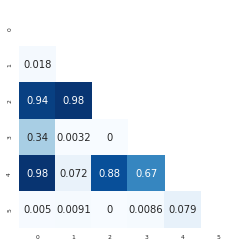

In [9]:
aux.plot_heatmap(aw_graph_traj.empirical_distribution().heatmap(), annot=True)

In [10]:
aw_top = aw_graph_traj.empirical_distribution().mode(5)
print("Probability\tEdge list: ")
for graph, prob in aw_top:
    print(str(prob)+ "\t\t"  + str(list(graph.edges())))

Probability	Edge list: 
0.3812		[(0, 2), (0, 4), (1, 2), (2, 4), (3, 4)]
0.1516		[(0, 2), (0, 3), (0, 4), (1, 2), (2, 4)]
0.1244		[(0, 2), (0, 4), (1, 2), (2, 4)]
0.1194		[(0, 2), (0, 3), (0, 4), (1, 2), (2, 4), (3, 4)]
0.0292		[(0, 2), (0, 4), (1, 2), (2, 4), (3, 4), (4, 5)]


In [11]:
aw_mapgraph = aw_graph_traj.empirical_distribution().mode(1)[0][0]

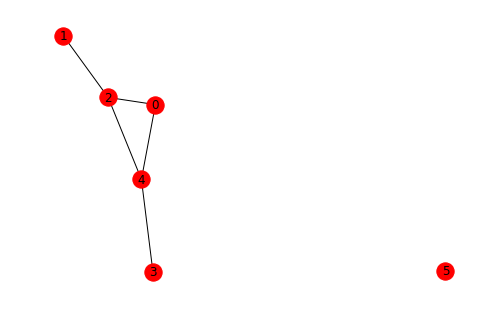

In [12]:
nx.draw(aw_mapgraph, with_labels=True)

### Gaussian graphical models (GGMs)

#### Simualted AR(1-5)-model

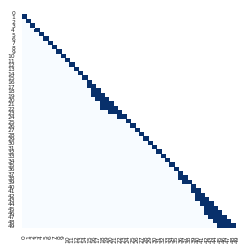

In [13]:
np.random.seed(2) # generates same data as in the paper
ar_graph = dlib.sample_random_AR_graph(n_dim=50, max_bandwidth=5)
aux.plot_heatmap(nx.to_numpy_array(ar_graph))
ar_cov_mat = gic.cov_matrix(ar_graph, 0.9, 1.0)
ar_df = pd.DataFrame(np.random.multivariate_normal(np.zeros(50), ar_cov_mat, 100))

In [14]:
ar_df.shape

(100, 50)

In [15]:
ar_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.878698,-1.044433,-0.994832,-0.540235,0.388393,-0.053121,-0.288285,-0.292727,0.000756,0.536629,...,-0.362839,0.565511,-0.003182,0.749745,0.745054,0.938986,0.131509,0.172086,0.232156,1.184147
1,-0.256525,-0.116048,-0.939653,-0.237265,-1.083843,0.096893,-0.206374,0.453107,0.623415,0.686505,...,-2.911721,-2.728024,-3.712332,-2.249938,-2.698523,-2.262295,-2.561439,-1.938907,-1.968094,-2.363825
2,-0.925658,-1.758184,-1.418430,-0.835956,-0.737220,-0.903629,-0.961176,-0.452963,-0.407657,-0.959168,...,0.179886,-0.221527,-0.534704,0.397889,0.031784,-0.122904,-0.052363,1.208847,0.151478,0.266227
3,0.875713,0.714240,0.231472,0.100144,-0.328630,0.270911,1.170769,0.077983,0.255248,0.499334,...,-0.990777,-1.127271,-0.766296,-0.707487,-0.726714,-1.331075,-0.724617,-0.440082,-0.467834,-0.910679
4,1.133365,0.993533,0.828134,-0.422246,0.047987,-0.316020,-0.254247,-0.465496,-0.699212,-0.252601,...,-0.275558,-0.300291,-0.661286,-0.582638,-0.851878,-0.550990,-0.470904,-0.501435,-0.250874,-0.759566


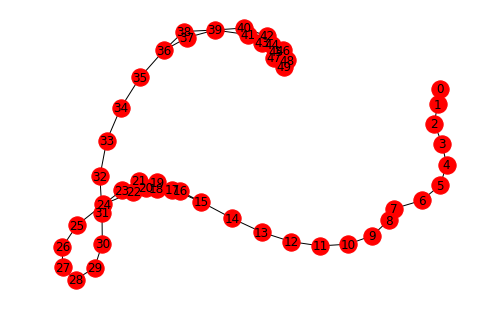

In [16]:
nx.draw(ar_graph, with_labels=True)

In [17]:
np.random.seed(1)
ar_graph_traj_seed1 = pdg.sample_trajectory_ggm(dataframe=ar_df, n_samples=10000,randomize=100, reset_cache=True)

Metropolis-Hastings samples: 100%|██████████| 9999/9999 [00:11<00:00, 902.00it/s] 

Total of 47041.0 updates, for an average of 4.70 per iteration


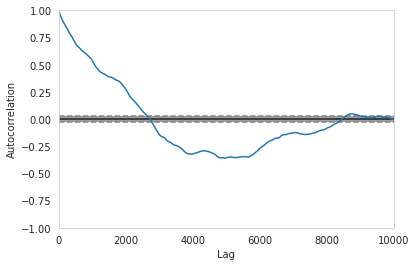

In [18]:
autocorrelation_plot(ar_graph_traj_seed1.size());

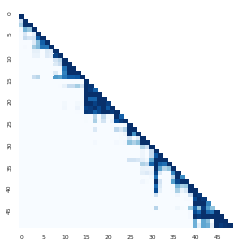

In [19]:
aux.plot_heatmap(ar_graph_traj_seed1.empirical_distribution(8000).heatmap(), xticklabels=5, yticklabels=5 )

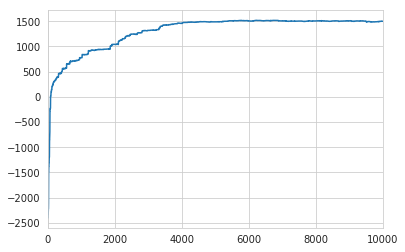

In [20]:
ar_graph_traj_seed1.log_likelihood().plot()

### Simulated 15 nodes log-linear model

In [4]:
loglin_graph = nx.Graph()
loglin_graph.add_nodes_from(range(15))
loglin_graph.add_edges_from([(0, 11), (0, 7), (1, 8), (1, 6), (2, 4), (3, 8), (3, 9),
                             (3, 10), (3, 4), (3, 6), (4, 6), (4, 8), (4, 9), (4, 10),
                             (5, 10), (5, 6), (6, 8), (6, 9), (6, 10), (7, 11), (8, 9),
                             (8, 10), (8, 11), (9, 10), (10, 11), (12, 13)])

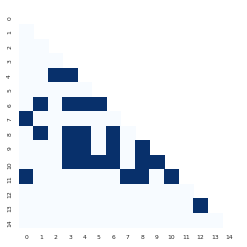

In [5]:
aux.plot_heatmap(nx.to_numpy_array(loglin_graph))

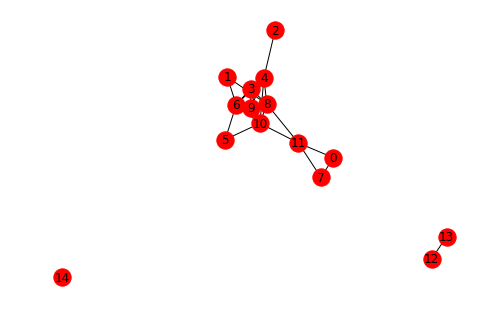

In [6]:
nx.draw(loglin_graph, with_labels=True)

In [7]:
np.random.seed(1)
levels = np.array([range(2)] * loglin_graph.order())
table = loglin.sample_prob_table(loglin_graph, levels, 1.0)

parallelDG/distributions/discrete_dec_log_linear.py:192: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sep_marg = np.sum(clique1_dist[indexing_clique1])
parallelDG/distributions/discrete_dec_log_linear.py:196: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  shape_clique2_dist = clique2_dist[indexing_clique2].shape
parallelDG/distributions/discrete_dec_log_linear.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as

In [8]:
np.random.seed(5)
loglin_df = pd.DataFrame(loglin.sample(table, 1000))
loglin_df.columns = [range(loglin_graph.order()), [len(l) for l in levels]]

parallelDG/distributions/discrete_dec_log_linear.py:313: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dist[level] = np.sum(table[index])


In [9]:
loglin_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1
2,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1
3,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0
4,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0


In [10]:
loglin_df.shape

(1000, 15)

In [11]:
loglin_graph_traj = pdg.sample_trajectory_loglin(dataframe=loglin_df, n_samples=10000, randomize=10)

Metropolis-Hastings samples: 100%|██████████| 9999/9999 [00:07<00:00, 1361.22it/s]

Total of 21633.0 updates, for an average of 2.16 per iteration


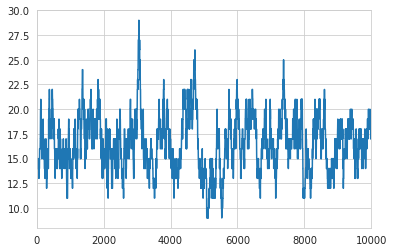

In [12]:
loglin_graph_traj.size().plot();

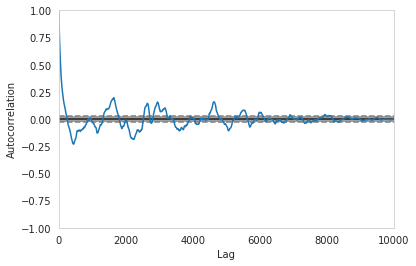

In [13]:
autocorrelation_plot(loglin_graph_traj.size());

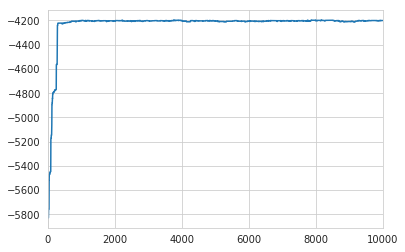

In [14]:
loglin_graph_traj.log_likelihood().plot();

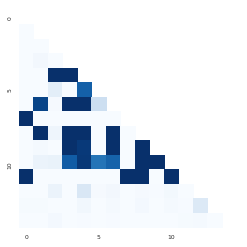

In [15]:
aux.plot_heatmap(loglin_graph_traj.empirical_distribution(6000).heatmap(), xticklabels=5, yticklabels=5 )

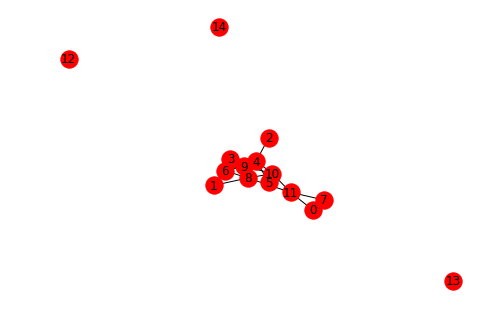

In [16]:
nx.draw(loglin_graph_traj.maximum_likelihood_graph(), with_labels=True)